In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib widget
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

from Finite_volume_method_1D import *

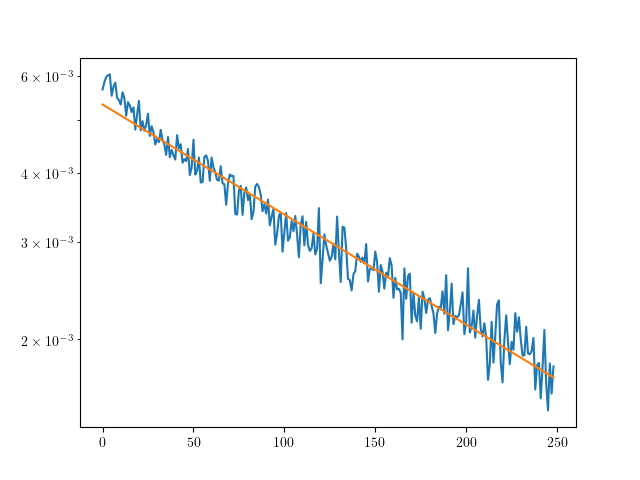

In [2]:
chippath = '../../DataKian/bTa_LT278W2chip5/'
filename = 'KID3_96dBm__TmK20_avgpulse_ampphase.csv'
length = 90

lambdanm = 402
KID402 = KID_data(chippath,lambdanm,filename,length)
KID402.fit_tail(start=250,end=-1)

L=KID402.L


In [3]:
params = KID_params(eta_pb=0.57,sigma_IC=0.7,Teff=0.11,KID=KID402,L=L)
params.print()

eta_pb: 	 0.57
sigma_IC: 	 0.7
Q0: 		 1.8211044022190084
lambda_ph: 	 0.402
tau_ringing: 	 0.5617264732506613
dthetadN: 	 5.906045429967e-05
N0: 		 30300000000.0
D0: 		 50
L: 		 0.004586835488671205
Delta: 		 0.00013254852308880002
lxhxw: 		 90 x 0.04 x 10.0


In [4]:
SIM = KID_sim(params=params,dt_init=0.001,dx_or_fraction=1/8,usesymmetry=False,D_const=False)

 98%|█████████▊| time (us): 100.08625565782012   


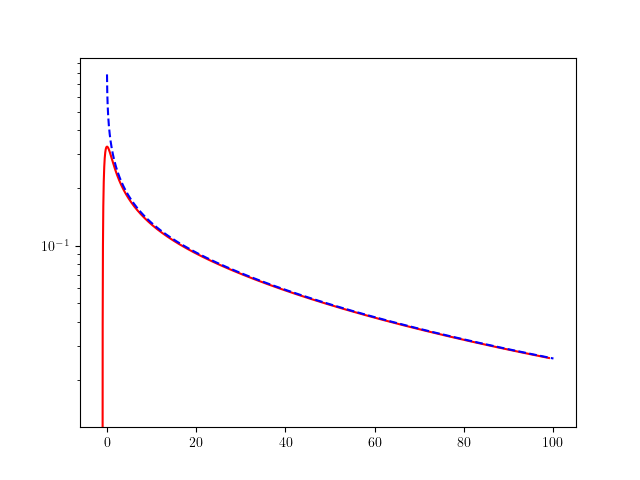

In [5]:
plt.figure()
plt.semilogy(SIM.t_axis_interp,SIM.phaseintime,color='r')
plt.semilogy(SIM.t_axis,SIM.Nqpintime*SIM.dthetadN,color='b',ls='--')
plt.show()

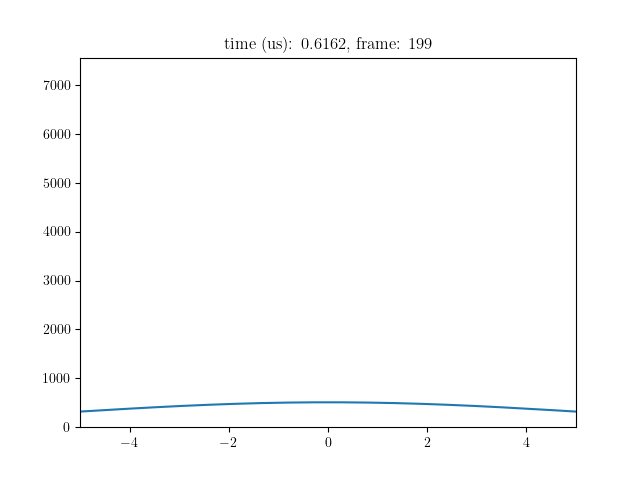

In [6]:
freq = 20 #hz
fig, ax=plt.subplots()
ax.axis([-5,5,0,np.max([np.max(Q) for Q in SIM.Qintime])])
line, = ax.plot([],[])

def animate(i):
    line.set_data(SIM.x_centers_list[i],SIM.Qintime[i])
    ax.set_title("time (us): {:.4f}, frame: {}".format(SIM.t_axis[i],i))

ani = animation.FuncAnimation(fig, animate, frames=200, interval=1000/freq, blit=True)

ani.save('movie.mp4',fps=freq,dpi=200)

In [36]:
def distfunc(phi,theta):
    return np.min(np.stack([KID402.height/2/np.sqrt(1-np.sin(phi)**2),KID402.length/2/np.sqrt(1-np.sin(theta)**2),KID402.width/2/np.sqrt(1-np.sin(np.pi/2-theta)**2)],axis=-1),axis=-1)

from scipy.integrate import dblquad

#phi=np.array([0.000001,np.pi/2,0.000001,np.pi/2])
#theta=np.array([0.000001,0.000001,np.pi/2,np.pi/2])
#print(distfunc(a,b))

dblquad(distfunc,0,np.pi/2,0,np.pi/2)[0]*4/np.pi**2

0.09978525663653781